In [1]:
import matplotlib.pyplot as plt
import ehrapy as ep

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
current_notebook_dir = %pwd

_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [5]:
adata_full = ep.dt.diabetes_130_fairlearn(
    columns_obs_only=[
        "race",
        "gender",
        "age",
        "readmitted",
        "readmit_binary",
        "discharge_disposition_id",
    ]
)
adata = adata_full[:200, :].copy()
del adata_full

[After loading data] RSS Memory usage: 511.56 MB


In [6]:
adata = ep.pp.encode(
    adata,
    autodetect=True,
)
print("encoded")

! Features 'time_in_hospital', 'num_procedures', 'number_diagnoses' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


encoded
[After encoding] RSS Memory usage: 512.56 MB


In [7]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.leiden(adata)
ep.tl.umap(adata)

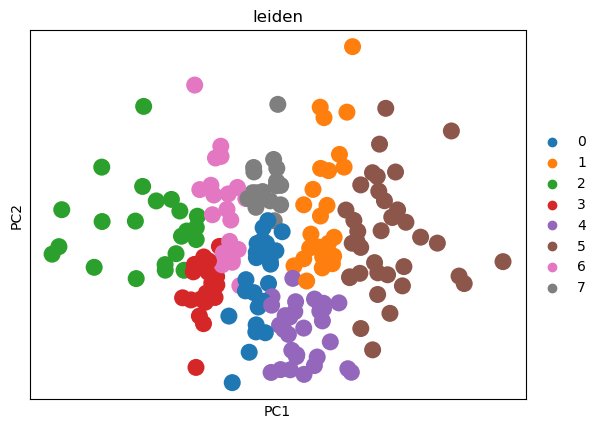

In [11]:
ep.pl.pca(adata, color="leiden", show=False)
plt.gcf().savefig(f"{_TEST_IMAGE_PATH}/pca_expected.png", dpi=80)